# Life-Cycle Labor Supply of Couples

Solves and simulates a $T$-period labor supply model with two-earner couples. <br>
**Motivated** by the study “Are Marriage-Related Taxes and Social Security Benefits Holding Back Female Labor Supply?” by Borella et al. (forthcoming). <br>
**Goal** is to replicate effects of individual vs. joint taxation.

For simplicity, couples cannot divorce nor save.

The **Bellman equation** and the recursive formulation of the model is 
$$
\begin{align*}
V_{t}(K_{1,t},K_{2,t}) & =\max_{h_{1,t},h_{2,t}}U(c_{t},h_{1,t},h_{2,t})+\beta V_{t+1}(K_{1,t+1},K_{2,t+1})\\
c_{t} & =\sum_{j=1}^{2}w_{j,t}h_{j,t}-T(w_{1,t}h_{1,t},w_{2,t}h_{2,t})\\
\log w_{j,t} & =\alpha_{j,0}+\alpha_{j,1}K_{j,t},\;j\in\{1,2\}\\
K_{j,t+1} & =(1-\delta)K_{j,t}+h_{j,t},\;j\in\{1,2\}
\end{align*}
$$

**Preferences** are sum of individuals
$$
U(c_{t},h_{1,t},h_{2,t})=2\frac{(c_{t}/2)^{1+\eta}}{1+\eta}-\rho_{1}\frac{h_{1,t}^{1+\gamma}}{1+\gamma}-\rho_{2}\frac{h_{2,t}^{1+\gamma}}{1+\gamma}
$$

**Taxes** are on the household level
HAS TO BE FIXED!
$$
T(Y_{1},Y_{2})=(1-\lambda(Y_{1}+Y_{2})^{-\tau})\cdot(Y_{1}+Y_{2})
$$
This means that the household budget is now
$$
c_{t}  =\sum_{j=1}^{2}w_{j,t}h_{j,t}-T(w_{1,t}h_{1,t})-T(w_{2,t}h_{2,t})\\
$$

**Terminal period:** There are no bequests such that
$$
V_{T}(K_{1,T},K_{2,T})  =\max_{h_{1,T},h_{2,T}}U(c_{T},h_{1,T},h_{2,T})
$$

$$
\begin{align}
h_{1,i,t} &= h_{1,t}^{\star}(k_{1,i,t},k_{2,i,t}) \\
h_{2,i,t} &= h_{2,t}^{\star}(k_{1,i,t},k_{2,i,t}) \\
k_{1,i,t+1} &= (1-\delta)k_{1,i,t} + h_{1,i,t}\\
k_{2,i,t+1} &= (1-\delta)k_{2,i,t} + h_{2,i,t}\\
\end{align}
$$

ADD SOMETHING ABOUT INITIAL VALUES!


## Setup

In [35]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
import scipy.optimize
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Consumption-Saving Model

In [36]:
# load local model file and initialize model class
from A2 import A2Model
from DynHouseholdLaborModel import DynHouseholdLaborModelClass
model = A2Model()
model_old = DynHouseholdLaborModelClass()

par = model.par
sol = model.sol
sim = model.sim

## Q1

In [37]:
model.solve()
model_old.solve()
model.simulate()
model_old.simulate()

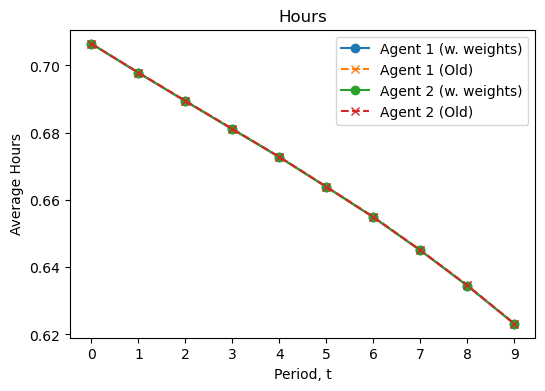

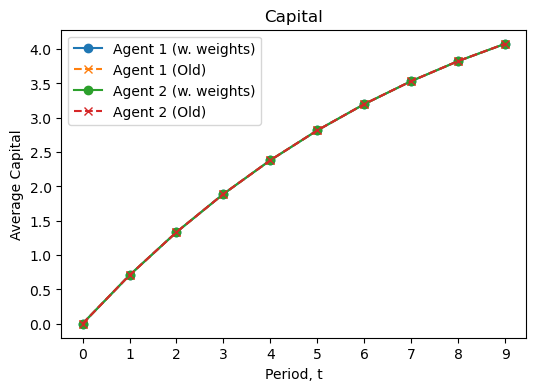

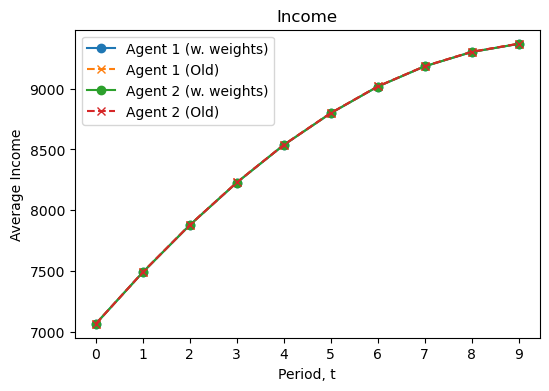

In [38]:
# Create a dictionary to map variable prefixes to their corresponding subplot titles
variables = {'h': 'Hours', 'k': 'Capital', 'income': 'Income'}

# Loop over each group of variables ('h', 'k', 'income')
for var_prefix, title in variables.items():
    fig, ax = plt.subplots(figsize=(6, 4))  # Create a new figure and axis for each variable group

    for suffix in ('1', '2'):
        var = f"{var_prefix}{suffix}"  # Construct variable name like 'h1', 'h2', etc.

        # Plotting current model data
        sim_data = np.mean(getattr(model.sim, var), axis=0)
        ax.plot(range(model.par.simT), sim_data, label=f'Agent {suffix} (w. weights)', marker='o', linestyle='-')

        # Plotting old model data
        sim_data_old = np.mean(getattr(model_old.sim, var), axis=0)
        ax.plot(range(model_old.par.simT), sim_data_old, label=f'Agent {suffix} (Old)', marker='x', linestyle='--')

    # Setting labels, title, and legend for each subplot
    ax.set_xlabel('Period, t')
    ax.set_ylabel(f'Average {title}')
    ax.set_xticks(range(model.par.simT))
    ax.legend()
    ax.set_title(title)

    plt.show()

## Q3

In [39]:
model_joint = A2Model()
model_indiv = A2Model(par={'joint_tax':False,'tax_scale':1.75,'tax_pow':0.0646416})
model_joint.solve()
model_indiv.solve()

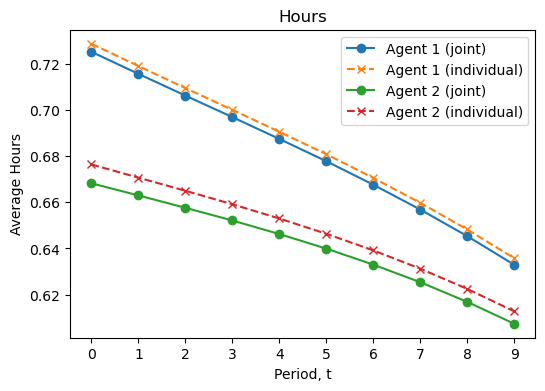

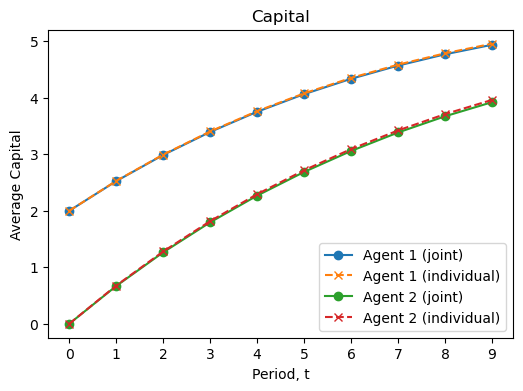

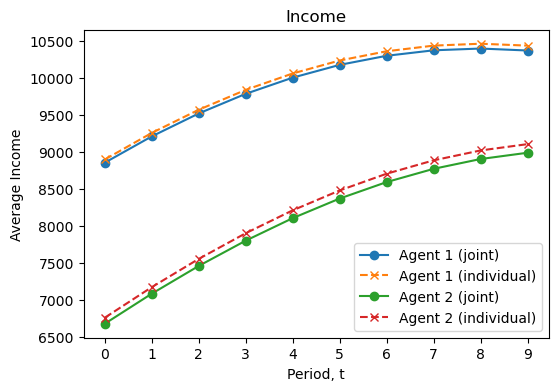

In [40]:
model_joint.sim.k1_init=2.0*np.ones(model.par.simN)
model_indiv.sim.k1_init=2.0*np.ones(model_indiv.par.simN)
model_joint.simulate()
model_indiv.simulate()
# Create a dictionary to map variable prefixes to their corresponding subplot titles
variables = {'h': 'Hours', 'k': 'Capital', 'income': 'Income'}

# Loop over each group of variables ('h', 'k', 'income')
for var_prefix, title in variables.items():
    fig, ax = plt.subplots(figsize=(6, 4))  # Create a new figure and axis for each variable group

    for suffix in ('1', '2'):
        var = f"{var_prefix}{suffix}"  # Construct variable name like 'h1', 'h2', etc.

        # Plotting current model data
        sim_data = np.mean(getattr(model_joint.sim, var), axis=0)
        ax.plot(range(model_joint.par.simT), sim_data, label=f'Agent {suffix} (joint)', marker='o', linestyle='-')

        # Plotting old model data
        sim_data_indiv = np.mean(getattr(model_indiv.sim, var), axis=0)
        ax.plot(range(model_indiv.par.simT), sim_data_indiv, label=f'Agent {suffix} (individual)', marker='x', linestyle='--')

    # Setting labels, title, and legend for each subplot
    ax.set_xlabel('Period, t')
    ax.set_ylabel(f'Average {title}')
    ax.set_xticks(range(model_joint.par.simT))
    ax.legend()
    ax.set_title(title)

    plt.show()

## Q4

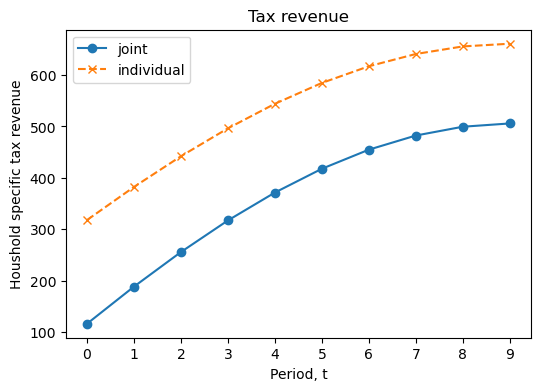

Household specific tax revenue change from joint to individual: 
 [201.69928092 193.86726073 186.28150851 179.11567371 172.64141555
 166.9128929  162.21053226 158.56522241 156.18196172 155.0402249 ]
Household specific tax revenue change from joint to individual relative: 
 [1.73240698 1.02788607 0.7279553  0.56443598 0.4646507  0.39947822
 0.35656028 0.32868532 0.31264974 0.30644602]
Sum of household specific tax revenue change from joint to individual: 
 1732.5159736295207


In [41]:
# Create a dictionary to map variable prefixes to their corresponding subplot titles
variables = {'taxrev': 'Tax revenue'}

# Loop over each group of variables ('h', 'k', 'income')
for var_prefix, title in variables.items():
    fig, ax = plt.subplots(figsize=(6, 4))  # Create a new figure and axis for each variable group

    var = f"{var_prefix}"  # Construct variable name like 'h1', 'h2', etc.

    # Plotting current model data
    sim_data = np.mean(getattr(model_joint.sim, var), axis=0)
    ax.plot(range(model_joint.par.simT), sim_data, label=f'joint', marker='o', linestyle='-')

    # Plotting old model data
    sim_data_indiv = np.mean(getattr(model_indiv.sim, var), axis=0)
    ax.plot(range(model_indiv.par.simT), sim_data_indiv, label=f'individual', marker='x', linestyle='--')

    # Setting labels, title, and legend for each subplot
    ax.set_xlabel('Period, t')
    ax.set_ylabel(f'Houshold specific tax revenue')
    ax.set_xticks(range(model_joint.par.simT))
    ax.legend()
    ax.set_title(title)

    plt.show()

#Per period change in tax revenue from joint to individual:
taxrev_change_from_joint_to_individual_absolute = model_indiv.sim.taxrev - model_joint.sim.taxrev
taxrev_change_from_joint_to_individual_relative = (model_indiv.sim.taxrev - model_joint.sim.taxrev)/model_joint.sim.taxrev
print(f'Household specific tax revenue change from joint to individual: \n {taxrev_change_from_joint_to_individual_absolute.mean(axis=0)}')
print(f'Household specific tax revenue change from joint to individual relative: \n {taxrev_change_from_joint_to_individual_relative.mean(axis=0)}')
print(f'Sum of household specific tax revenue change from joint to individual: \n {taxrev_change_from_joint_to_individual_absolute.mean(axis=0).sum(axis=0)}')

## Q5


In [42]:
#Change tax_scale such that the total tax revenue change from joint to individual is zero
model_private = A2Model(par={'joint_tax':False,'tax_scale':1.75,'tax_pow':0.0646416})

def find_lambda_private(tax_scale):
    model_private.par.tax_scale=tax_scale
    model_private.solve()
    model_private.sim.k1_init=2.0*np.ones(model.par.simN)
    model_private.simulate()
    obj = (model_private.sim.taxrev - model_joint.sim.taxrev).mean().sum()**2
    #print(obj)
    return obj

res=scipy.optimize.minimize_scalar(find_lambda_private, bounds=(0.00001, 4), method='bounded')
print(res)

model_private.par.tax_scale=res.x

model_private.solve()
model_private.sim.k1_init=2.0*np.ones(model.par.simN)
model_private.simulate()
print(f'Total tax revenue change from joint to private: \n {model_private.sim.taxrev.sum(axis=0) - model_joint.sim.taxrev.sum(axis=0)}')
print(f'Tax scale: \n {model_private.par.tax_scale}')

 message: Solution found.
 success: True
  status: 0
     fun: 0.00017450843162603467
       x: 1.7669890505512629
     nit: 10
    nfev: 10
Total tax revenue change from joint to private: 
 [ 51213.82098326  36286.23812119  22320.1406523    9500.87266401
  -1850.60419889 -11650.15203772 -19567.85392044 -25572.39718596
 -29424.54256652 -31123.42087178]
Tax scale: 
 1.7669890505512629


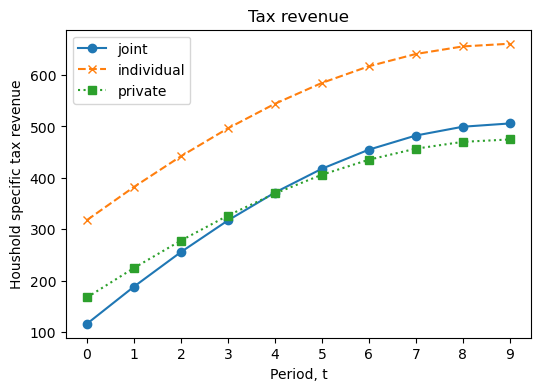

In [43]:
# Create a dictionary to map variable prefixes to their corresponding subplot titles
variables = {'taxrev': 'Tax revenue'}

# Loop over each group of variables ('h', 'k', 'income')
for var_prefix, title in variables.items():
    fig, ax = plt.subplots(figsize=(6, 4))  # Create a new figure and axis for each variable group

    var = f"{var_prefix}"  # Construct variable name like 'h1', 'h2', etc.

    # Plotting joint model data
    sim_data = np.mean(getattr(model_joint.sim, var), axis=0)
    ax.plot(range(model_joint.par.simT), sim_data, label=f'joint', marker='o', linestyle='-')

    # Plotting individual model data
    sim_data_indiv = np.mean(getattr(model_indiv.sim, var), axis=0)
    ax.plot(range(model_indiv.par.simT), sim_data_indiv, label=f'individual', marker='x', linestyle='--')

    # Plotting private model data
    sim_data_indiv = np.mean(getattr(model_private.sim, var), axis=0)
    ax.plot(range(model_private.par.simT), sim_data_indiv, label=f'private', marker='s', linestyle=':')
    
    # Setting labels, title, and legend for each subplot
    ax.set_xlabel('Period, t')
    ax.set_ylabel(f'Houshold specific tax revenue')
    ax.set_xticks(range(model_joint.par.simT))
    ax.legend()
    ax.set_title(title)

    plt.show()

## Q6

In [44]:
print(f'First-period value function under private taxation and (k1_0,k2_0)=(2,0): {model_private.value(period=0)}')
print(f'First-period value function under joint taxation and (k1_0,k2_0)=(2,0): {model_joint.value(period=0)}')
print(f'A household with (k1_0,k2_0)=(2,0) prefer the tax system with:')
if model_private.value(period=0) > model_joint.value(period=0):
    print(f'private taxation')
else:
    print(f'joint taxation')

initial_capital=8.0

model_pri_88 = model_private.copy()
model_pri_88.sim.k1_init=initial_capital*np.ones(model.par.simN)
model_pri_88.sim.k2_init=initial_capital*np.ones(model.par.simN)
model_pri_88.simulate()

model_joint_88 = model_joint.copy()
model_joint_88.sim.k1_init=initial_capital*np.ones(model.par.simN)
model_joint_88.sim.k2_init=initial_capital*np.ones(model.par.simN)
model_joint_88.simulate()
print(f'First-period value function under private taxation with (k1_0,k2_0)=(8,8): {model_pri_88.value(period=0)}')
print(f'First-period value function under joint taxation with (k1_0,k2_0)=(8,8): {model_joint_88.value(period=0)}')
print(f'A household with (k1_0,k2_0)=(8,8) prefer the tax system with:')
if model_pri_88.value(period=0) > model_joint_88.value(period=0):
    print(f'private taxation')
else:
    print(f'joint taxation')


First-period value function under private taxation and (k1_0,k2_0)=(2,0): -0.22669991771119902
First-period value function under joint taxation and (k1_0,k2_0)=(2,0): -0.22673145341850862
A household with (k1_0,k2_0)=(2,0) prefer the tax system with:
private taxation
First-period value function under private taxation with (k1_0,k2_0)=(8,8): -0.18835726003719022
First-period value function under joint taxation with (k1_0,k2_0)=(8,8): -0.1891057282889845
A household with (k1_0,k2_0)=(8,8) prefer the tax system with:
private taxation


In [45]:
#Without approximation error
print(f'First-period value function under private taxation and (k1_0,k2_0)=(2,0): {model_private.value(period=0,approximation=False)}')
print(f'First-period value function under joint taxation and (k1_0,k2_0)=(2,0): {model_joint.value(period=0,approximation=False)}')
print(f'A household with (k1_0,k2_0)=(2,0) prefer the tax system with:')
if model_private.value(period=0,approximation=False) > model_joint.value(period=0,approximation=False):
    print(f'private taxation')
else:
    print(f'joint taxation')

initial_capital=8.0

model_pri_88 = model_private.copy()
model_pri_88.sim.k1_init=initial_capital*np.ones(model.par.simN)
model_pri_88.sim.k2_init=initial_capital*np.ones(model.par.simN)
model_pri_88.simulate()

model_joint_88 = model_joint.copy()
model_joint_88.sim.k1_init=initial_capital*np.ones(model.par.simN)
model_joint_88.sim.k2_init=initial_capital*np.ones(model.par.simN)
model_joint_88.simulate()
print(f'First-period value function under private taxation with (k1_0,k2_0)=(8,8): {model_pri_88.value(period=0,approximation=False)}')
print(f'First-period value function under joint taxation with (k1_0,k2_0)=(8,8): {model_joint_88.value(period=0,approximation=False)}')
print(f'A household with (k1_0,k2_0)=(8,8) prefer the tax system with:')
if model_pri_88.value(period=0,approximation=False) > model_joint_88.value(period=0,approximation=False):
    print(f'private taxation')
else:
    print(f'joint taxation')


First-period value function under private taxation and (k1_0,k2_0)=(2,0): -0.2267814625297113
First-period value function under joint taxation and (k1_0,k2_0)=(2,0): -0.2268239312014108
A household with (k1_0,k2_0)=(2,0) prefer the tax system with:
private taxation
First-period value function under private taxation with (k1_0,k2_0)=(8,8): -0.18840532979445956
First-period value function under joint taxation with (k1_0,k2_0)=(8,8): -0.18916083806562642
A household with (k1_0,k2_0)=(8,8) prefer the tax system with:
private taxation
